# Inversion of secondary potentials

In [19]:
import matplotlib.pyplot as plt
from icsd3d_class import iCSD3d as i3d
from plotters.mpl_plot import showObs2d
from scipy.special import gamma
from scipy.optimize import least_squares
import numpy as np

In [20]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

### Define inversion parameters
We start with an unconstrainsted inversion (no initial guess, no prior model)

In [32]:
icsdPath = './movB/' # schemeMALM_full test

icsd_TDIP=i3d(dirName=icsdPath) 
icsd_TDIP.alphaSxy= True
icsd_TDIP.logTrans=False  
icsd_TDIP.obs_err='sqrt' # sqrt choose between constant weight and w = 1/sqrt(abs(obs))
icsd_TDIP.wr=1e2 #weight regularization
icsd_TDIP.method_m0='Pearson'
icsd_TDIP.x0_prior=True
icsd_TDIP.x0_ini_guess=True # initial guess
icsd_TDIP.alphax0=1e2 # initial guess

### Create the survey and estimate m0
The input format for observation and simulated files is based on the pygimli/BERT unified format. More here: http://resistivity.net/bert/data_format.html
`Vp_norm = True` implies a normalisation of the secondary voltage by the primary voltage $Vs_{n} = Vs/Vp$

In [22]:
gates = icsd_TDIP.createTDIPSurvey(fname_obs='OBS_MALM_TDIP_hom.data', 
                                    fname_sim='VRTe_SIM_VSi.data',
                                    Vp_norm=True)

gates = icsd_TDIP.createTDIPSurvey(fname_obs='OBS_MALM_TDIP.data', fname_sim='VRTe_SIM_Vp.txt',
                                      Vp_norm=True) 


createTDIPSurvey
import obs
relaxing CC constrainst for time domain IP
100000.0
initiation ICSD
log transformation: False
obs_err: sqrt
1e-05
initiation ICSD
log transformation: False
obs_err: sqrt
errRmin not correctly set, adjust
1e-05
initiation ICSD
log transformation: False
obs_err: sqrt
errRmin not correctly set, adjust
1e-05
initiation ICSD
log transformation: False
obs_err: sqrt
errRmin not correctly set, adjust
1e-05
initiation ICSD
log transformation: False
obs_err: sqrt
errRmin not correctly set, adjust
1e-05
initiation ICSD
log transformation: False
obs_err: sqrt
errRmin not correctly set, adjust
1e-05
initiation ICSD
log transformation: False
obs_err: sqrt
errRmin not correctly set, adjust
1e-05
initiation ICSD
log transformation: False
obs_err: sqrt
errRmin not correctly set, adjust
1e-05
initiation ICSD
log transformation: False
obs_err: sqrt
errRmin not correctly set, adjust
1e-05
initiation ICSD
log transformation: False
obs_err: sqrt
errRmin not correctly set, adjust


### Use Vp as simulated data

In [23]:
m0 = icsd_TDIP.estimateM0(method_m0='Pearson',show=False)

[-1.41e+02 -8.06e+01 -4.04e-01 -2.47e+00 -1.79e+00 -1.10e+00 -6.56e+01
 -6.63e+01 -5.30e+01 -2.63e-01 -2.69e+00 -2.02e+00 -1.23e+00 -2.39e+01
 -2.99e+01 -2.91e+01 -1.60e-01 -3.29e+00 -2.42e+00 -1.40e+00 -8.80e+00
 -1.10e+01 -9.92e+00 -7.29e-02 -4.78e+00 -2.99e+00 -1.48e+00 -1.86e-01
 -1.41e+00 -8.48e+00 -1.45e-02 -8.62e+00 -2.94e+00 -1.10e+00  6.82e+00
  9.56e+00  1.07e+01  5.05e+00  5.36e-01  2.56e-01  9.27e-02  1.73e+01
  1.98e+01  1.64e+01  1.10e+01  6.10e+00  3.32e+00  1.75e+00  4.61e+01
  4.07e+01  2.76e+01  1.76e+01  1.08e+01  6.28e+00  3.27e+00  8.15e+01
  4.13e+01  2.41e+01  1.44e+01  8.43e+00  2.89e+00  4.51e+00  5.69e+00
  4.41e-01  8.34e+01  1.44e+02  3.59e+00  5.59e+00  6.93e+00  3.06e-01
  5.72e+01  6.99e+01  6.77e+01  4.71e+00  7.51e+00  9.38e+00  2.24e-01
  3.52e+01  3.51e+01  2.71e+01  6.42e+00  1.06e+01  1.42e+01  1.77e-01
  1.94e+01  1.85e+01  1.38e+01  8.65e+00  1.43e+01  2.40e+01  2.29e-01
  6.93e+00  9.95e+00  7.73e+00  1.21e+01  1.72e+01  1.86e+01  1.10e+01
  7.37

  2.13e+00  7.52e+01  3.51e+01  1.90e+01  1.08e+01  6.13e+00]
[-1.41e+02 -8.06e+01 -4.04e-01 -2.47e+00 -1.79e+00 -1.10e+00 -6.56e+01
 -6.63e+01 -5.30e+01 -2.63e-01 -2.69e+00 -2.02e+00 -1.23e+00 -2.39e+01
 -2.99e+01 -2.91e+01 -1.60e-01 -3.29e+00 -2.42e+00 -1.40e+00 -8.80e+00
 -1.10e+01 -9.92e+00 -7.29e-02 -4.78e+00 -2.99e+00 -1.48e+00 -1.86e-01
 -1.41e+00 -8.48e+00 -1.45e-02 -8.62e+00 -2.94e+00 -1.10e+00  6.82e+00
  9.56e+00  1.07e+01  5.05e+00  5.36e-01  2.56e-01  9.27e-02  1.73e+01
  1.98e+01  1.64e+01  1.10e+01  6.10e+00  3.32e+00  1.75e+00  4.61e+01
  4.07e+01  2.76e+01  1.76e+01  1.08e+01  6.28e+00  3.27e+00  8.15e+01
  4.13e+01  2.41e+01  1.44e+01  8.43e+00  2.89e+00  4.51e+00  5.69e+00
  4.41e-01  8.34e+01  1.44e+02  3.59e+00  5.59e+00  6.93e+00  3.06e-01
  5.72e+01  6.99e+01  6.77e+01  4.71e+00  7.51e+00  9.38e+00  2.24e-01
  3.52e+01  3.51e+01  2.71e+01  6.42e+00  1.06e+01  1.42e+01  1.77e-01
  1.94e+01  1.85e+01  1.38e+01  8.65e+00  1.43e+01  2.40e+01  2.29e-01
  6.93e+00  9.9

### Pearson coefficient at time T1 (gate nb1)

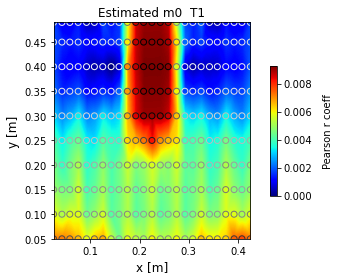

In [24]:
f, ax = plt.subplots()
icsd_TDIP.showEstimateM0(ax=ax,index=1)

In [25]:
# F1 coefficient at time T1 (gate nb1)
m0 = icsd_TDIP.estimateM0(method_m0='F1',show=False)

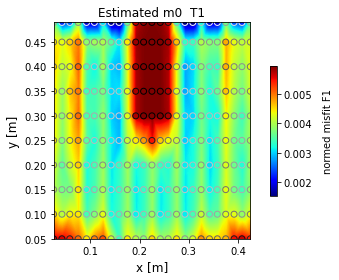

In [26]:
f, ax = plt.subplots()
icsd_TDIP.showEstimateM0(ax=ax,index=1)

### Invert and show results

In [27]:
sol = icsd_TDIP.invert()

run_single i=0
[-1.41e+02 -8.06e+01 -4.04e-01 -2.47e+00 -1.79e+00 -1.10e+00 -6.56e+01
 -6.63e+01 -5.30e+01 -2.63e-01 -2.69e+00 -2.02e+00 -1.23e+00 -2.39e+01
 -2.99e+01 -2.91e+01 -1.60e-01 -3.29e+00 -2.42e+00 -1.40e+00 -8.80e+00
 -1.10e+01 -9.92e+00 -7.29e-02 -4.78e+00 -2.99e+00 -1.48e+00 -1.86e-01
 -1.41e+00 -8.48e+00 -1.45e-02 -8.62e+00 -2.94e+00 -1.10e+00  6.82e+00
  9.56e+00  1.07e+01  5.05e+00  5.36e-01  2.56e-01  9.27e-02  1.73e+01
  1.98e+01  1.64e+01  1.10e+01  6.10e+00  3.32e+00  1.75e+00  4.61e+01
  4.07e+01  2.76e+01  1.76e+01  1.08e+01  6.28e+00  3.27e+00  8.15e+01
  4.13e+01  2.41e+01  1.44e+01  8.43e+00  2.89e+00  4.51e+00  5.69e+00
  4.41e-01  8.34e+01  1.44e+02  3.59e+00  5.59e+00  6.93e+00  3.06e-01
  5.72e+01  6.99e+01  6.77e+01  4.71e+00  7.51e+00  9.38e+00  2.24e-01
  3.52e+01  3.51e+01  2.71e+01  6.42e+00  1.06e+01  1.42e+01  1.77e-01
  1.94e+01  1.85e+01  1.38e+01  8.65e+00  1.43e+01  2.40e+01  2.29e-01
  6.93e+00  9.95e+00  7.73e+00  1.21e+01  1.72e+01  1.86e+01  

CURRENT Sum=3.057462384863814e-05
run_single i=3
[-1.41e+02 -8.06e+01 -4.04e-01 -2.47e+00 -1.79e+00 -1.10e+00 -6.56e+01
 -6.63e+01 -5.30e+01 -2.63e-01 -2.69e+00 -2.02e+00 -1.23e+00 -2.39e+01
 -2.99e+01 -2.91e+01 -1.60e-01 -3.29e+00 -2.42e+00 -1.40e+00 -8.80e+00
 -1.10e+01 -9.92e+00 -7.29e-02 -4.78e+00 -2.99e+00 -1.48e+00 -1.86e-01
 -1.41e+00 -8.48e+00 -1.45e-02 -8.62e+00 -2.94e+00 -1.10e+00  6.82e+00
  9.56e+00  1.07e+01  5.05e+00  5.36e-01  2.56e-01  9.27e-02  1.73e+01
  1.98e+01  1.64e+01  1.10e+01  6.10e+00  3.32e+00  1.75e+00  4.61e+01
  4.07e+01  2.76e+01  1.76e+01  1.08e+01  6.28e+00  3.27e+00  8.15e+01
  4.13e+01  2.41e+01  1.44e+01  8.43e+00  2.89e+00  4.51e+00  5.69e+00
  4.41e-01  8.34e+01  1.44e+02  3.59e+00  5.59e+00  6.93e+00  3.06e-01
  5.72e+01  6.99e+01  6.77e+01  4.71e+00  7.51e+00  9.38e+00  2.24e-01
  3.52e+01  3.51e+01  2.71e+01  6.42e+00  1.06e+01  1.42e+01  1.77e-01
  1.94e+01  1.85e+01  1.38e+01  8.65e+00  1.43e+01  2.40e+01  2.29e-01
  6.93e+00  9.95e+00  7.73e+

CURRENT Sum=2.472735952235159e-05
run_single i=6
[-1.41e+02 -8.06e+01 -4.04e-01 -2.47e+00 -1.79e+00 -1.10e+00 -6.56e+01
 -6.63e+01 -5.30e+01 -2.63e-01 -2.69e+00 -2.02e+00 -1.23e+00 -2.39e+01
 -2.99e+01 -2.91e+01 -1.60e-01 -3.29e+00 -2.42e+00 -1.40e+00 -8.80e+00
 -1.10e+01 -9.92e+00 -7.29e-02 -4.78e+00 -2.99e+00 -1.48e+00 -1.86e-01
 -1.41e+00 -8.48e+00 -1.45e-02 -8.62e+00 -2.94e+00 -1.10e+00  6.82e+00
  9.56e+00  1.07e+01  5.05e+00  5.36e-01  2.56e-01  9.27e-02  1.73e+01
  1.98e+01  1.64e+01  1.10e+01  6.10e+00  3.32e+00  1.75e+00  4.61e+01
  4.07e+01  2.76e+01  1.76e+01  1.08e+01  6.28e+00  3.27e+00  8.15e+01
  4.13e+01  2.41e+01  1.44e+01  8.43e+00  2.89e+00  4.51e+00  5.69e+00
  4.41e-01  8.34e+01  1.44e+02  3.59e+00  5.59e+00  6.93e+00  3.06e-01
  5.72e+01  6.99e+01  6.77e+01  4.71e+00  7.51e+00  9.38e+00  2.24e-01
  3.52e+01  3.51e+01  2.71e+01  6.42e+00  1.06e+01  1.42e+01  1.77e-01
  1.94e+01  1.85e+01  1.38e+01  8.65e+00  1.43e+01  2.40e+01  2.29e-01
  6.93e+00  9.95e+00  7.73e+

CURRENT Sum=2.1117206749079213e-05
run_single i=9
[-1.41e+02 -8.06e+01 -4.04e-01 -2.47e+00 -1.79e+00 -1.10e+00 -6.56e+01
 -6.63e+01 -5.30e+01 -2.63e-01 -2.69e+00 -2.02e+00 -1.23e+00 -2.39e+01
 -2.99e+01 -2.91e+01 -1.60e-01 -3.29e+00 -2.42e+00 -1.40e+00 -8.80e+00
 -1.10e+01 -9.92e+00 -7.29e-02 -4.78e+00 -2.99e+00 -1.48e+00 -1.86e-01
 -1.41e+00 -8.48e+00 -1.45e-02 -8.62e+00 -2.94e+00 -1.10e+00  6.82e+00
  9.56e+00  1.07e+01  5.05e+00  5.36e-01  2.56e-01  9.27e-02  1.73e+01
  1.98e+01  1.64e+01  1.10e+01  6.10e+00  3.32e+00  1.75e+00  4.61e+01
  4.07e+01  2.76e+01  1.76e+01  1.08e+01  6.28e+00  3.27e+00  8.15e+01
  4.13e+01  2.41e+01  1.44e+01  8.43e+00  2.89e+00  4.51e+00  5.69e+00
  4.41e-01  8.34e+01  1.44e+02  3.59e+00  5.59e+00  6.93e+00  3.06e-01
  5.72e+01  6.99e+01  6.77e+01  4.71e+00  7.51e+00  9.38e+00  2.24e-01
  3.52e+01  3.51e+01  2.71e+01  6.42e+00  1.06e+01  1.42e+01  1.77e-01
  1.94e+01  1.85e+01  1.38e+01  8.65e+00  1.43e+01  2.40e+01  2.29e-01
  6.93e+00  9.95e+00  7.73e

CURRENT Sum=1.7578718474243106e-05
run_single i=12
[-1.41e+02 -8.06e+01 -4.04e-01 -2.47e+00 -1.79e+00 -1.10e+00 -6.56e+01
 -6.63e+01 -5.30e+01 -2.63e-01 -2.69e+00 -2.02e+00 -1.23e+00 -2.39e+01
 -2.99e+01 -2.91e+01 -1.60e-01 -3.29e+00 -2.42e+00 -1.40e+00 -8.80e+00
 -1.10e+01 -9.92e+00 -7.29e-02 -4.78e+00 -2.99e+00 -1.48e+00 -1.86e-01
 -1.41e+00 -8.48e+00 -1.45e-02 -8.62e+00 -2.94e+00 -1.10e+00  6.82e+00
  9.56e+00  1.07e+01  5.05e+00  5.36e-01  2.56e-01  9.27e-02  1.73e+01
  1.98e+01  1.64e+01  1.10e+01  6.10e+00  3.32e+00  1.75e+00  4.61e+01
  4.07e+01  2.76e+01  1.76e+01  1.08e+01  6.28e+00  3.27e+00  8.15e+01
  4.13e+01  2.41e+01  1.44e+01  8.43e+00  2.89e+00  4.51e+00  5.69e+00
  4.41e-01  8.34e+01  1.44e+02  3.59e+00  5.59e+00  6.93e+00  3.06e-01
  5.72e+01  6.99e+01  6.77e+01  4.71e+00  7.51e+00  9.38e+00  2.24e-01
  3.52e+01  3.51e+01  2.71e+01  6.42e+00  1.06e+01  1.42e+01  1.77e-01
  1.94e+01  1.85e+01  1.38e+01  8.65e+00  1.43e+01  2.40e+01  2.29e-01
  6.93e+00  9.95e+00  7.73

CURRENT Sum=1.540360664317457e-05
run_single i=15
[-1.41e+02 -8.06e+01 -4.04e-01 -2.47e+00 -1.79e+00 -1.10e+00 -6.56e+01
 -6.63e+01 -5.30e+01 -2.63e-01 -2.69e+00 -2.02e+00 -1.23e+00 -2.39e+01
 -2.99e+01 -2.91e+01 -1.60e-01 -3.29e+00 -2.42e+00 -1.40e+00 -8.80e+00
 -1.10e+01 -9.92e+00 -7.29e-02 -4.78e+00 -2.99e+00 -1.48e+00 -1.86e-01
 -1.41e+00 -8.48e+00 -1.45e-02 -8.62e+00 -2.94e+00 -1.10e+00  6.82e+00
  9.56e+00  1.07e+01  5.05e+00  5.36e-01  2.56e-01  9.27e-02  1.73e+01
  1.98e+01  1.64e+01  1.10e+01  6.10e+00  3.32e+00  1.75e+00  4.61e+01
  4.07e+01  2.76e+01  1.76e+01  1.08e+01  6.28e+00  3.27e+00  8.15e+01
  4.13e+01  2.41e+01  1.44e+01  8.43e+00  2.89e+00  4.51e+00  5.69e+00
  4.41e-01  8.34e+01  1.44e+02  3.59e+00  5.59e+00  6.93e+00  3.06e-01
  5.72e+01  6.99e+01  6.77e+01  4.71e+00  7.51e+00  9.38e+00  2.24e-01
  3.52e+01  3.51e+01  2.71e+01  6.42e+00  1.06e+01  1.42e+01  1.77e-01
  1.94e+01  1.85e+01  1.38e+01  8.65e+00  1.43e+01  2.40e+01  2.29e-01
  6.93e+00  9.95e+00  7.73e

CURRENT Sum=1.2936911333743412e-05
run_single i=18
[-1.41e+02 -8.06e+01 -4.04e-01 -2.47e+00 -1.79e+00 -1.10e+00 -6.56e+01
 -6.63e+01 -5.30e+01 -2.63e-01 -2.69e+00 -2.02e+00 -1.23e+00 -2.39e+01
 -2.99e+01 -2.91e+01 -1.60e-01 -3.29e+00 -2.42e+00 -1.40e+00 -8.80e+00
 -1.10e+01 -9.92e+00 -7.29e-02 -4.78e+00 -2.99e+00 -1.48e+00 -1.86e-01
 -1.41e+00 -8.48e+00 -1.45e-02 -8.62e+00 -2.94e+00 -1.10e+00  6.82e+00
  9.56e+00  1.07e+01  5.05e+00  5.36e-01  2.56e-01  9.27e-02  1.73e+01
  1.98e+01  1.64e+01  1.10e+01  6.10e+00  3.32e+00  1.75e+00  4.61e+01
  4.07e+01  2.76e+01  1.76e+01  1.08e+01  6.28e+00  3.27e+00  8.15e+01
  4.13e+01  2.41e+01  1.44e+01  8.43e+00  2.89e+00  4.51e+00  5.69e+00
  4.41e-01  8.34e+01  1.44e+02  3.59e+00  5.59e+00  6.93e+00  3.06e-01
  5.72e+01  6.99e+01  6.77e+01  4.71e+00  7.51e+00  9.38e+00  2.24e-01
  3.52e+01  3.51e+01  2.71e+01  6.42e+00  1.06e+01  1.42e+01  1.77e-01
  1.94e+01  1.85e+01  1.38e+01  8.65e+00  1.43e+01  2.40e+01  2.29e-01
  6.93e+00  9.95e+00  7.73

CURRENT Sum=1.1265961688793232e-05


### Show current decay curve

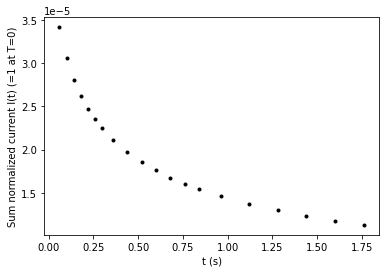

In [31]:
t = np.array([0.06, 0.1 , 0.14, 0.18, 0.22, 0.26, 0.3 , 0.36, 0.44, 0.52, 0.6 ,
       0.68, 0.76, 0.84, 0.96, 1.12, 1.28, 1.44, 1.6 , 1.76])

i_t = []
for i in range(len(sol)-1):
    i_t.append(sum(sol[i+1].solution.x)) 
f, ax = plt.subplots()
plt.plot(t[:],i_t[:],'.k')
plt.ylabel('Sum normalized current I(t) (=1 at T=0)')
plt.xlabel('t (s)')
plt.savefig(icsdPath+'i_t.png', dpi=400)

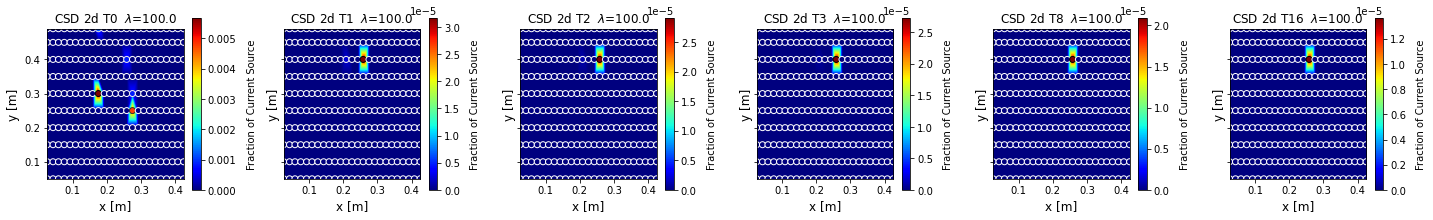

In [28]:
gateid = [0,1,2,3,8,16]
fig, axs = plt.subplots(1, 6, sharex='all', sharey='all',figsize=(20,5))
for i, j in  enumerate(gateid):
    icsd_TDIP.showResults(ax=axs[i],index=j)
plt.savefig(icsdPath+'icsd_Vs.png', dpi=400)

A CC model is fitted using Pelton's model:

$$    m(t)= m_{0}\sum^{\infty}_{n=0} \frac{(-1)^{n}(t/\tau)^{nc}}{\Gamma(1+nc)}$$